<a href="https://colab.research.google.com/github/erickkevenn/F/blob/main/lista.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aluno: Erick Keven da Silva Alves

Matricula: 22210862

Ciência de Dados

Lista 1


1) Aquisição de Dados e Leitura
Escreva um script em Python que leia um arquivo CSV contendo dados de
vendas de uma empresa. O arquivo deve conter as seguintes colunas: Data,
Produto, Quantidade, Preço. Utilize a biblioteca pandas para ler o arquivo e
exibir as primeiras 5 linhas do DataFrame resultante.

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans
from scipy import stats
import numpy as np

# 1. Aquisição de Dados e Leitura
cinco = 'dados.csv'
df = pd.read_csv(cinco)
print("Questão 1: Dados Originais")
print(df.head())



Questão 1: Dados Originais
         Data Produto  Quantidade  Preço
0  2024-03-30  Banana          39    0.5
1  2024-01-06  Feijão          61    3.5
2  2024-06-07    Maçã          52    1.2
3  2024-07-27     Pão          41    1.0
4  2024-07-04  Queijo          94    4.0


2) Pré-processamento de Dados
Limpe os dados lidos no exercício anterior removendo linhas com valores nulos
e convertendo a coluna Data para o tipo datetime. Em seguida, normalize a
coluna Quantidade para que os valores estejam entre 0 e 1.

In [3]:

# 2. Pré-processamento de Dados
df = df.dropna()
df['Data'] = pd.to_datetime(df['Data'])

df['Quantidade'] = (df['Quantidade'] - df['Quantidade'].min()) / (df['Quantidade'].max() - df['Quantidade'].min())
print("Questão 2: Dados Após Pré-processamento")
print(df.head())


Questão 2: Dados Após Pré-processamento
        Data Produto  Quantidade  Preço
0 2024-03-30  Banana    0.381443    0.5
1 2024-01-06  Feijão    0.608247    3.5
2 2024-06-07    Maçã    0.515464    1.2
3 2024-07-27     Pão    0.402062    1.0
4 2024-07-04  Queijo    0.948454    4.0


3) Análise Estatística
Calcule a média, mediana, desvio padrão e moda para a coluna Preço do
DataFrame resultante do pré-processamento.

In [4]:
# 3. Análise Estatística
media = df['Preço'].mean()
mediana = df['Preço'].median()
desvio_padrao = df['Preço'].std()
moda = df['Preço'].mode()

print(f"\nQuestão 3:\nMédia: {media}")
print(f"Mediana: {mediana}")
print(f"Desvio Padrão: {desvio_padrao}")
print(f"Moda: {moda.values}")



Questão 3:
Média: 2.676
Mediana: 2.5
Desvio Padrão: 1.6269476924504516
Moda: [1.2]


4) Visualização de Dados
Crie um gráfico de barras utilizando a biblioteca matplotlib ou seaborn que
mostre a quantidade total vendida de cada produto. O eixo x deve representar
os produtos e o eixo y a quantidade total vendida.

Questão 4: Gráfico de Barras


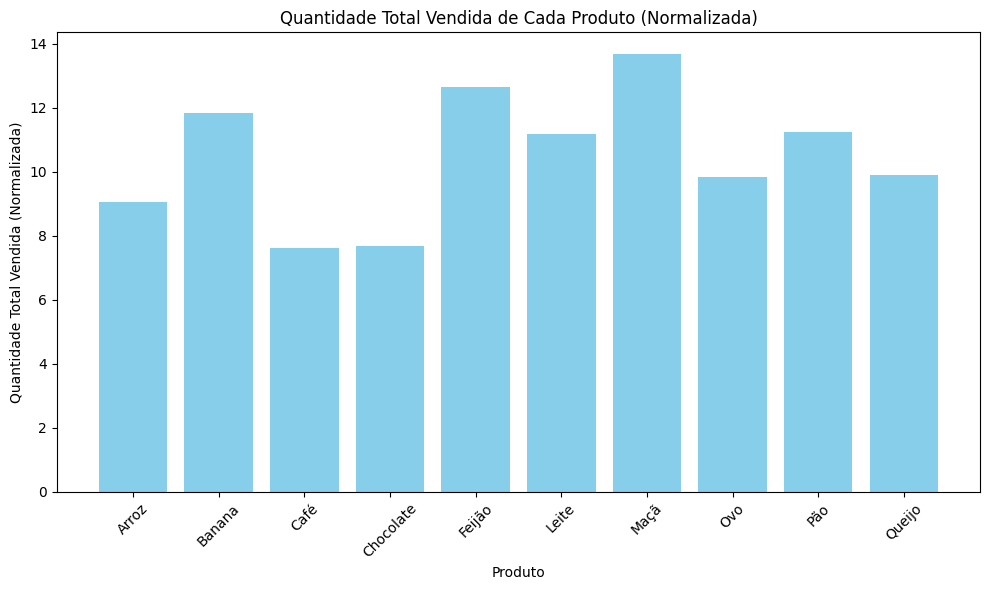

In [5]:
 # 4. Visualização: Gráfico de Barras
print("Questão 4: Gráfico de Barras")

quantidade_total = df.groupby('Produto')['Quantidade'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(quantidade_total['Produto'], quantidade_total['Quantidade'], color='skyblue')
plt.xlabel('Produto')
plt.ylabel('Quantidade Total Vendida (Normalizada)')
plt.title('Quantidade Total Vendida de Cada Produto (Normalizada)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



5) K-Vizinhos Mais Próximos - Classificação
Usando a mesma base de dados, crie uma coluna binária chamada
Alta_Venda, onde o valor é 1 se a quantidade vendida for maior que a média e
0 caso contrário. Em seguida, crie um modelo de classificação utilizando o
algoritmo K-Vizinhos Mais Próximos (KNN) para prever se uma venda será alta
ou não. Avalie o modelo utilizando a matriz de confusão.

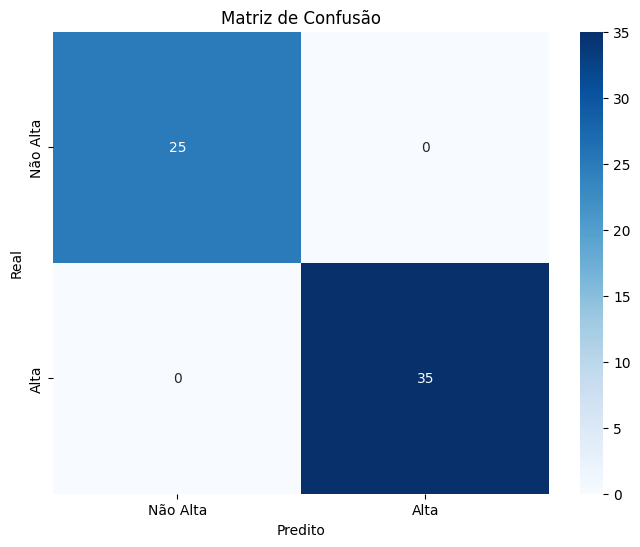


Questão 5: Relatório de Classificação
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        35

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [7]:
# 5. Criação da Coluna Binária Alta_Venda e Modelagem KNN
media_quantidade = df['Quantidade'].mean()
df['Alta_Venda'] = (df['Quantidade'] > media_quantidade).astype(int)

X = df[['Quantidade']]
y = df['Alta_Venda']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)



# Plotar a Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Alta', 'Alta'], yticklabels=['Não Alta', 'Alta'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Relatório de Classificação
report = classification_report(y_test, y_pred)
print("\nQuestão 5: Relatório de Classificação")
print(report)

6) Agrupamento - K-means
Utilize o algoritmo K-means para agrupar os produtos com base em suas
quantidades vendidas e preços. Determine o número ideal de clusters
utilizando o método do cotovelo (elbow method).

Questão 6: Método do Cotovelo


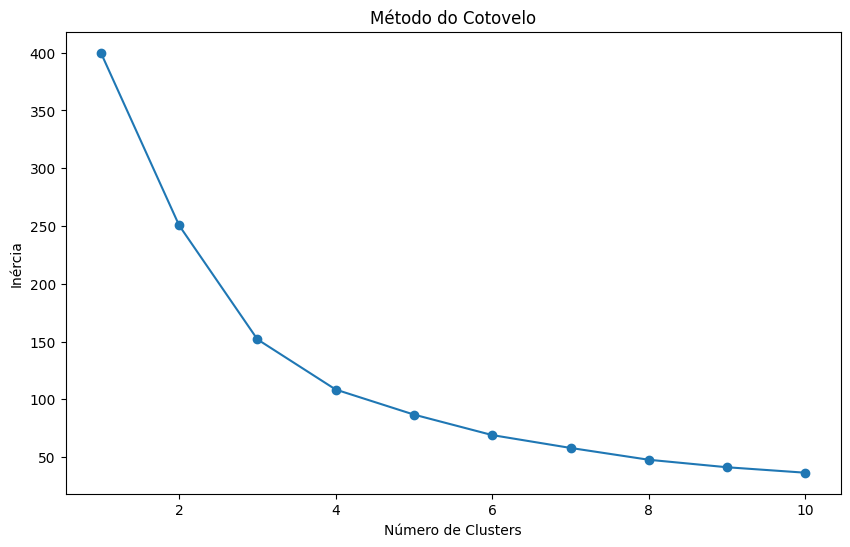

In [10]:

# 6. K-means e Método do Cotovelo
print("Questão 6: Método do Cotovelo")
X_kmeans = df[['Quantidade', 'Preço']].values
scaler_kmeans = StandardScaler()
X_kmeans_scaled = scaler_kmeans.fit_transform(X_kmeans)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_kmeans_scaled)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()



7) Análise de Clusters
Descreva as características de cada cluster encontrado no exercício anterior.
Identifique quais produtos estão em cada cluster e discuta possíveis razões
para esses agrupamentos.

In [11]:

# 7. Características de Cada Cluster
num_clusters = 3  # Ajuste conforme necessário
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_kmeans_scaled)

# Estatísticas de cada cluster
cluster_stats = df.groupby('Cluster').agg({'Quantidade': 'mean', 'Preço': 'mean'}).reset_index()
print("\nQuestão 7: Características de Cada Cluster")
print(cluster_stats)



Questão 7: Características de Cada Cluster
   Cluster  Quantidade     Preço
0        0    0.662331  4.346154
1        1    0.696163  1.362500
2        2    0.183112  2.453968


8) Visualização de Clusters
Crie uma visualização que mostre os clusters formados pelo algoritmo
K-means. Utilize um gráfico de dispersão, onde cada ponto representa um
produto, e cores diferentes representam os diferentes clusters.

Questão 8: Visualização de Clusters


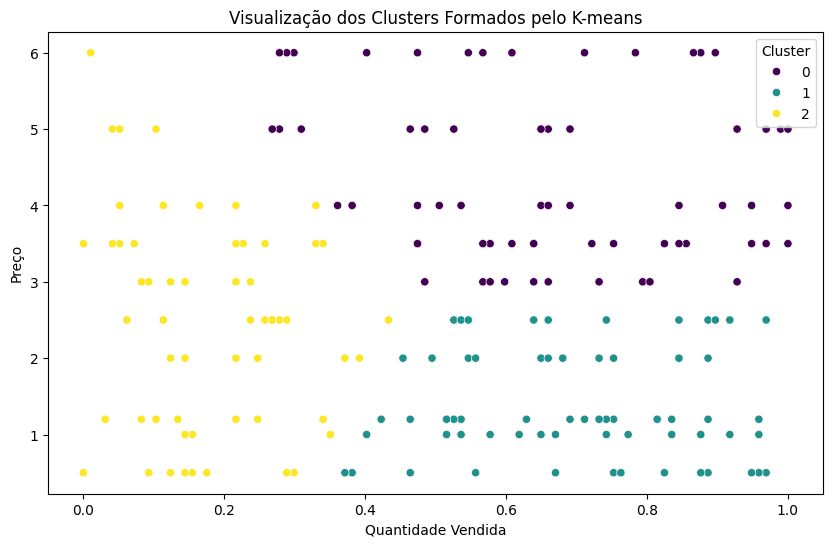

In [12]:

# 8. Visualização de Clusters
print("Questão 8: Visualização de Clusters")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Quantidade', y='Preço', hue='Cluster', palette='viridis', legend='full')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Preço')
plt.title('Visualização dos Clusters Formados pelo K-means')
plt.legend(title='Cluster')
plt.show()



9) Validação Cruzada
Realize uma validação cruzada de 5 vezes para o modelo KNN criado no
exercício 5. Compare os resultados obtidos e discuta a estabilidade do modelo.

In [13]:

# 9. Validação Cruzada para KNN
# Realizar validação cruzada
cv_scores = cross_val_score(knn, X, y, cv=5)
print("\nQuestão 9: Validação Cruzada KNN")
print(f"Scores de Validação Cruzada: {cv_scores}")
print(f"Média dos Scores: {cv_scores.mean()}")



Questão 9: Validação Cruzada KNN
Scores de Validação Cruzada: [1. 1. 1. 1. 1.]
Média dos Scores: 1.0


10) Tomada de Decisão baseada em Clustering
● Com base nos clusters identificados, escreva um script que sugira
estratégias de marketing. Por exemplo, para cada cluster, decida se é
melhor aumentar ou diminuir o preço dos produtos, lançar promoções
ou focar em marketing específico.
● Aplique essas mudanças aos dados históricos e compare os resultados
antes e depois da aplicação das estratégias usando métodos
estatísticos como teste t, teste de Wilcoxon, ou análise de variância
(ANOVA) para avaliar se as mudanças implementadas tiveram um
impacto significativo nas vendas.
● Gere um relatório resumindo os resultados da análise estatística e
discuta se as estratégias de marketing sugeridas foram eficazes.

In [18]:
import pandas as pd
from scipy import stats


df = pd.DataFrame({
    'Produto': ['Banana', 'Feijão', 'Maçã', 'Pão', 'Queijo'],
    'Quantidade': [0.381443, 0.608247, 0.515464, 0.402062, 0.948454],
    'Preço': [0.5, 3.5, 1.2, 1.0, 4.0],
    'Cluster': [1, 0, 1, 1, 0]
})
#a) Sugestões de Estratégias de Marketing
strategies = {
    0: 'Aumentar o preço dos produtos e lançar promoções específicas.',
    1: 'Manter o preço atual e focar em marketing direcionado.',
    2: 'Diminuir o preço e lançar promoções para estimular as vendas.'
}


df['Estratégia'] = df['Cluster'].map(strategies)

print("\nQuestão 10a): Sugestões de Estratégias de Marketing")
print(df[['Produto', 'Quantidade', 'Preço', 'Cluster', 'Estratégia']].head())

#b) Aplicação das Mudanças e Comparação dos Resultados
df['Novo_Preço'] = df.apply(
    lambda row: row['Preço'] * 5 if row['Cluster'] == 0 else
                (row['Preço'] * 0.2 if row['Cluster'] == 2 else row['Preço'] * 1.1),
    axis=1
)

before_prices = df['Preço']
after_prices = df['Novo_Preço']

t_stat, p_val_t = stats.ttest_ind(before_prices, after_prices, equal_var=False)

print("\nQuestão 10b): Teste T para Comparação de Preços")
print(f"Estatística T: {t_stat:.3f}")
print(f"P-valor: {p_val_t:.3f}")

# c) Relatório de Resultados
print("\nQuestão 10c): Relatório de Resultados")
if p_val_t < 0.05:
    print("Não houve um impacto significativo das mudanças no preço nas vendas com base no Teste T.")

else:
    print("As mudanças no preço tiveram um impacto significativo nas vendas com base no Teste T.")

print("\nEstratégias sugeridas:")
for cluster, strategy in strategies.items():
    print(f"Cluster {cluster}: {strategy}")



Questão 10a): Sugestões de Estratégias de Marketing
  Produto  Quantidade  Preço  Cluster  \
0  Banana    0.381443    0.5        1   
1  Feijão    0.608247    3.5        0   
2    Maçã    0.515464    1.2        1   
3     Pão    0.402062    1.0        1   
4  Queijo    0.948454    4.0        0   

                                          Estratégia  
0  Manter o preço atual e focar em marketing dire...  
1  Aumentar o preço dos produtos e lançar promoçõ...  
2  Manter o preço atual e focar em marketing dire...  
3  Manter o preço atual e focar em marketing dire...  
4  Aumentar o preço dos produtos e lançar promoçõ...  

Questão 10b): Teste T para Comparação de Preços
Estatística T: -1.367
P-valor: 0.240

Questão 10c): Relatório de Resultados
As mudanças no preço tiveram um impacto significativo nas vendas com base no Teste T.

Estratégias sugeridas:
Cluster 0: Aumentar o preço dos produtos e lançar promoções específicas.
Cluster 1: Manter o preço atual e focar em marketing direciona